In [31]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV data
df = pd.read_csv('transaction_data.csv',delimiter=";")

df.head()

,Transaction,Tx address,Timestamp,Tx Fee ETH,Gas Price Gwei,Run No.,encode_tx_At
0,requestCat,0xfd94bcca5a8d637668bacdaafa95434ec57740adbc62...,Aug-16-2023 09:02:12 PM +UTC,0.00065811312218181 ETH\n$0.00,3.55412149 Gwei (0.00000000355412149 ETH),18.0,2023-08-16T21:02:37.747104Z
1,requestCat,0x2d2f524f98e0f0c5b169f683623a1431c1fdf007821d...,Aug-16-2023 09:02:24 PM +UTC,0.000661662770989461 ETH\n$0.00,3.573291269 Gwei (0.000000003573291269 ETH),19.0,2023-08-16T21:02:49.667171Z
2,requestCat,0xd96356ff6dfac097c3324c89e5cc59e5467ad6516b1c...,Aug-16-2023 09:02:36 PM +UTC,0.000663588072333045 ETH\n$0.00,3.583688805 Gwei (0.000000003583688805 ETH),20.0,2023-08-16T21:03:13.536574Z
3,requestCat,0xb4809529ad1a259f93335e63f0e99864017afaa5e75b...,Aug-16-2023 09:02:48 PM +UTC,0.000644327851379049 ETH\n$0.00,3.479674521 Gwei (0.000000003479674521 ETH),21.0,2023-08-16T21:03:26.682269Z
4,requestCat,0x74d5cd5695a79ec321f22eca8e14847bf82e1b79cc17...,Aug-16-2023 09:03:12 PM +UTC,0.000642052405455591 ETH\n$0.00,3.467386039 Gwei (0.000000003467386039 ETH),22.0,2023-08-16T21:03:50.673760Z


In [41]:
def data_calc(column, tx_type):
  # Convert Timestamp to datetime objects using specific format and UTC timezone
  data = df[df['Transaction'] == tx_type].copy()

  if (column == 'Time_Difference'):
    data['Timestamp'] = pd.to_datetime(data['Timestamp'], format='%b-%d-%Y %I:%M:%S %p +UTC').dt.tz_localize('UTC')

    # Convert encode_tx_At to datetime objects
    data['encode_tx_At'] = pd.to_datetime(data['encode_tx_At'])

    # Calculate the difference between encode_tx_At and Timestamp in seconds
    data['Time_Difference'] = ((data['encode_tx_At'] - data['Timestamp']).dt.total_seconds()).astype(float)

  elif (column == 'Gas_Price_Gwei'):
      data['Gas_Price_Gwei'] = data['Gas Price Gwei'].str.extract(r'([\d.]+)')[0].astype(float)

  elif (column == 'Tx_Fee_ETH'):
      data['Tx_Fee_ETH'] = data['Tx Fee ETH'].str.extract(r'([\d.]+)')[0].astype(float)
    

  average = data[column].mean()
  # Find the index of maximum and minimum values
  max_index = data[column].idxmax()
  min_index = data[column].idxmin()
  max_data = data[column].max()

  plt.figure(figsize=(10, 3))
  plt.plot(data.index, data[column], linestyle='-', color='b', label='Transaction')
  plt.axhline(y=average, color='grey', linestyle='--', label='Average')
  plt.scatter([max_index, min_index], [data[column][max_index], data[column][min_index]], marker='x', color='red', label='Max/Min Points')
  plt.xlabel('Transaction Index')
  plt.ylabel(column)
  plt.title('Transaction index over ' + column + ' - tx: ' + tx_type)

  if (column == 'Tx_Fee_ETH'):
     # Annotate TPS values next to each red 'x' marker
    for index, value in zip([max_index, min_index], [data[column][max_index], data[column][min_index]]):
        plt.annotate(f"{value:.6f}", (index, value), textcoords="offset points", xytext=(10,0), ha='left')

    # Annotate average TPS value at the bottom left corner
    plt.annotate(f"Average: {average:.6f}", (0, max_data-max_data*0.05), textcoords="offset points", xytext=(10, 10), fontsize=9, color='black')
  else:
    # Annotate TPS values next to each red 'x' marker
    for index, value in zip([max_index, min_index], [data[column][max_index], data[column][min_index]]):
        plt.annotate(f"{value:.2f}", (index, value), textcoords="offset points", xytext=(10,0), ha='left')

    # Annotate average TPS value at the bottom left corner
    plt.annotate(f"Average: {average:.2f}", (0, max_data-max_data*0.1), textcoords="offset points", xytext=(10, 10), fontsize=9, color='black')

  plt.grid(True)
  plt.legend()
  plt.tight_layout()
  
  plt.show()

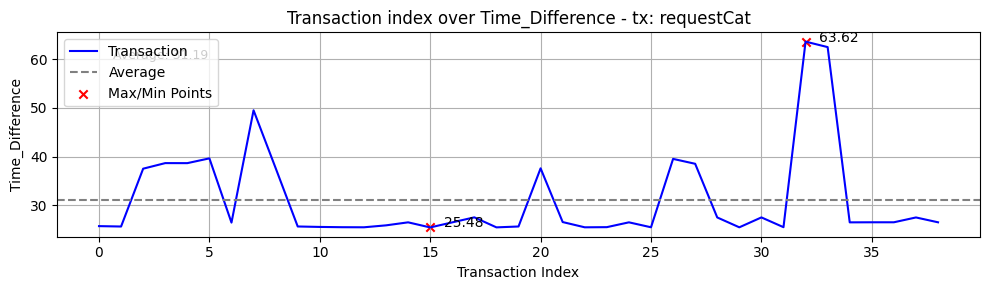

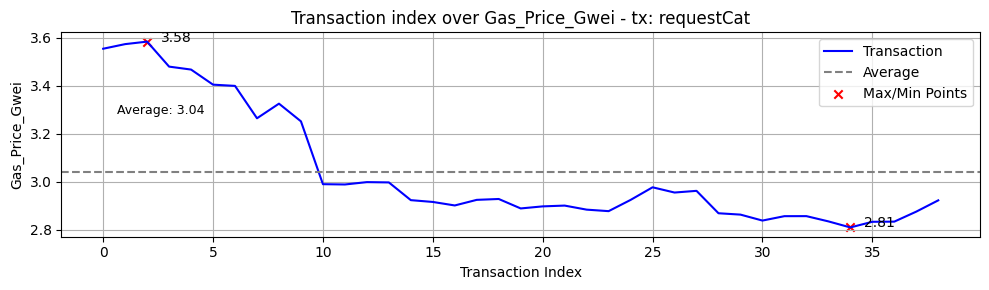

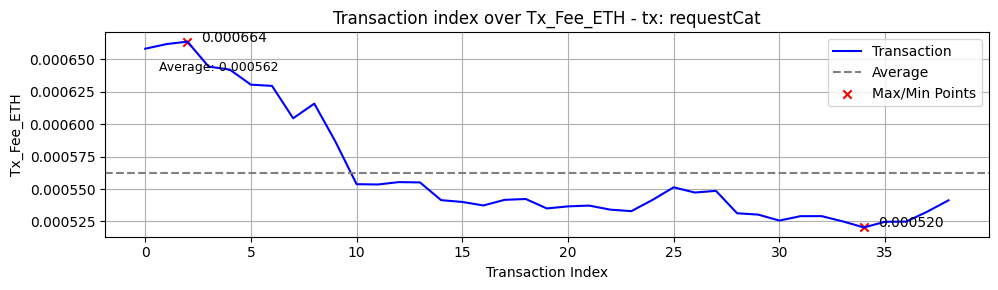

In [11]:
data_calc('Time_Difference', 'requestCat')
data_calc('Gas_Price_Gwei', 'requestCat')
data_calc('Tx_Fee_ETH', 'requestCat')

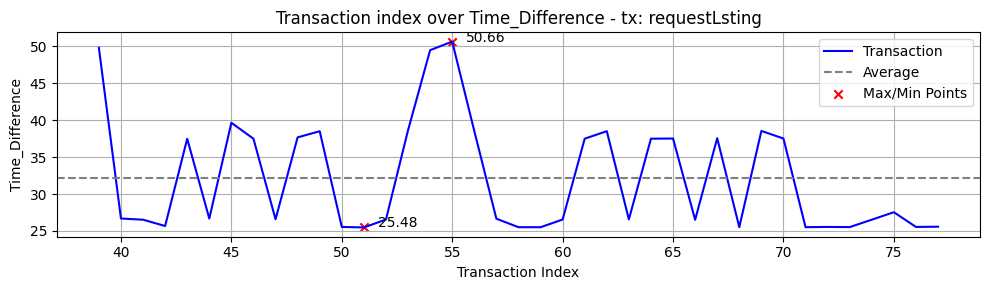

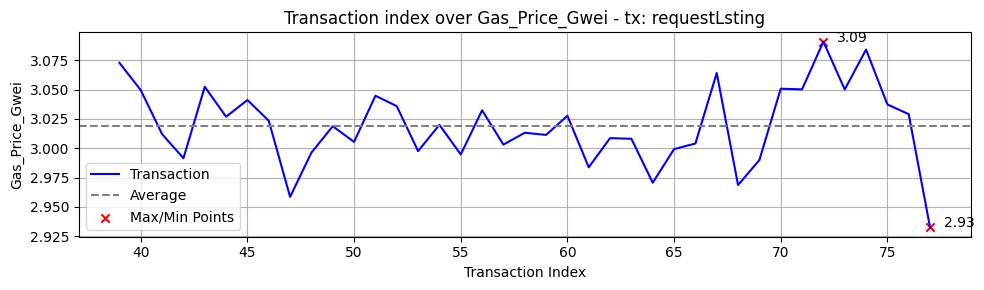

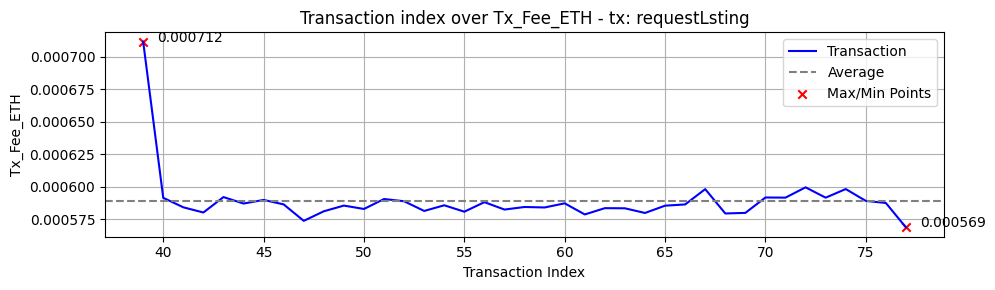

In [12]:
data_calc('Time_Difference', 'requestLsting')
data_calc('Gas_Price_Gwei', 'requestLsting')
data_calc('Tx_Fee_ETH', 'requestLsting')

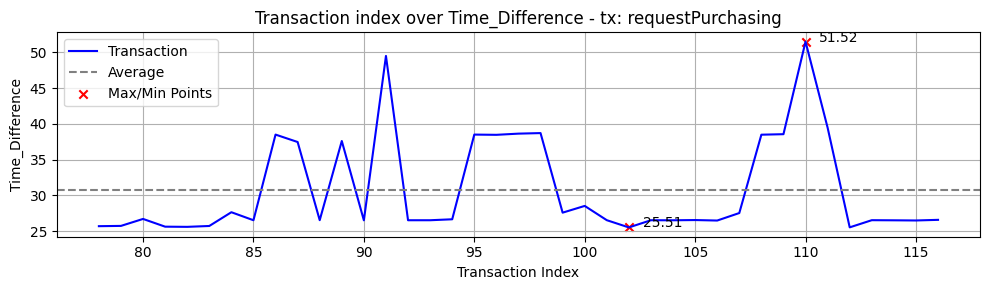

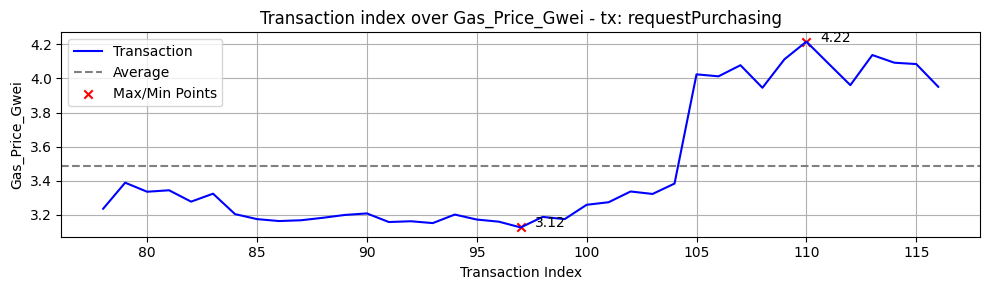

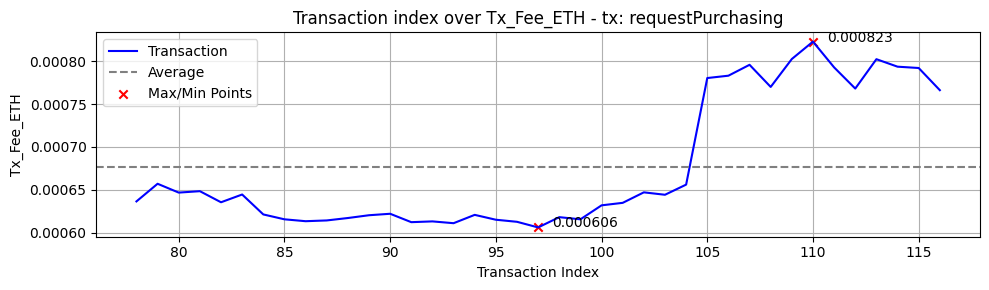

In [13]:
data_calc('Time_Difference', 'requestPurchasing')
data_calc('Gas_Price_Gwei', 'requestPurchasing')
data_calc('Tx_Fee_ETH', 'requestPurchasing')

In [58]:
def data_box_plot(column):
    # Filter the DataFrame for the specified column
    data = df.copy()

    if column == 'Time_Difference':
        data['Timestamp'] = pd.to_datetime(data['Timestamp'], format='%b-%d-%Y %I:%M:%S %p +UTC').dt.tz_localize('UTC')
        data['encode_tx_At'] = pd.to_datetime(data['encode_tx_At'])
        data['Time_Difference'] = ((data['encode_tx_At'] - data['Timestamp']).dt.total_seconds()).astype(float)

    elif column == 'Gas_Price_Gwei':
        data['Gas_Price_Gwei'] = data['Gas Price Gwei'].str.extract(r'([\d.]+)')[0].astype(float)

    elif column == 'Tx_Fee_ETH':
        data['Tx_Fee_ETH'] = data['Tx Fee ETH'].str.extract(r'([\d.]+)')[0].astype(float)

    # Create a dictionary to store data for different transaction types
    data_by_tx_type = {
        'requestCat': data[data['Transaction'] == 'requestCat'][column],
        'requestListing': data[data['Transaction'] == 'requestListing'][column],
        'requestPurchasing': data[data['Transaction'] == 'requestPurchasing'][column]
    }

    # Calculate overall average
    overall_average = data[column].mean()

    # Generate summary statistics using df.describe() for each transaction type (same as previous code)
    for tx_type, values in data_by_tx_type.items():
        print(f"Summary Statistics for Transaction Type: {tx_type}")
        print(values.describe())
        print("-" * 40)

    # Plotting
    plt.figure(figsize=(5, 5))
    plt.boxplot(data_by_tx_type.values(), vert=True, labels=data_by_tx_type.keys())
    
    plt.ylabel(column)
    plt.title(f'{column} Distribution across Transaction Types')

    # Annotate medians and averages (same as previous code)

    # Annotate overall average as a horizontal dashed line
    plt.axhline(y=overall_average, color='b', linestyle='--', label=f'Overall Avg: {overall_average:.6f}')
    plt.legend()

    plt.grid(True)
    plt.tight_layout()

    plt.savefig('files/'+column+'.png')
    
    plt.show()

Summary Statistics for Transaction Type: requestCat
count    39.000000
mean     31.186715
std       9.622225
min      25.479418
25%      25.624496
50%      26.526088
75%      37.574354
max      63.616548
Name: Time_Difference, dtype: float64
----------------------------------------
Summary Statistics for Transaction Type: requestListing
count    39.000000
mean     32.233657
std       7.714258
min      25.480118
25%      25.626696
50%      26.685415
75%      37.626875
max      50.660322
Name: Time_Difference, dtype: float64
----------------------------------------
Summary Statistics for Transaction Type: requestPurchasing
count    39.000000
mean     30.790025
std       7.036131
min      25.513449
25%      26.508153
50%      26.547449
75%      38.043054
max      51.521777
Name: Time_Difference, dtype: float64
----------------------------------------


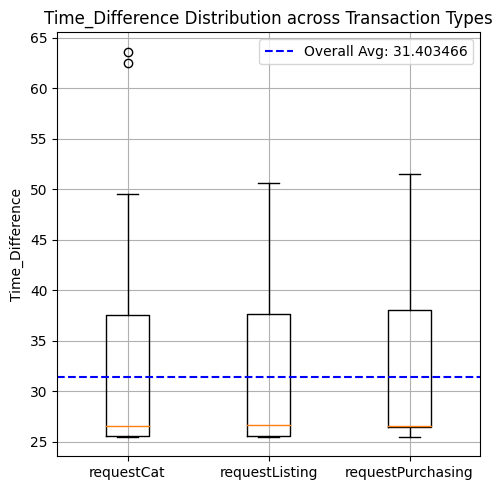

In [59]:
data_box_plot('Time_Difference')


Summary Statistics for Transaction Type: requestCat
count    39.000000
mean      3.039775
std       0.244437
min       2.810474
25%       2.877238
50%       2.924966
75%       3.125469
max       3.583689
Name: Gas_Price_Gwei, dtype: float64
----------------------------------------
Summary Statistics for Transaction Type: requestListing
count    39.000000
mean      3.019284
std       0.033849
min       2.932368
25%       2.998418
50%       3.018791
75%       3.042998
max       3.091038
Name: Gas_Price_Gwei, dtype: float64
----------------------------------------
Summary Statistics for Transaction Type: requestPurchasing
count    39.000000
mean      3.485860
std       0.394894
min       3.124710
25%       3.177490
50%       3.276237
75%       3.956004
max       4.216510
Name: Gas_Price_Gwei, dtype: float64
----------------------------------------


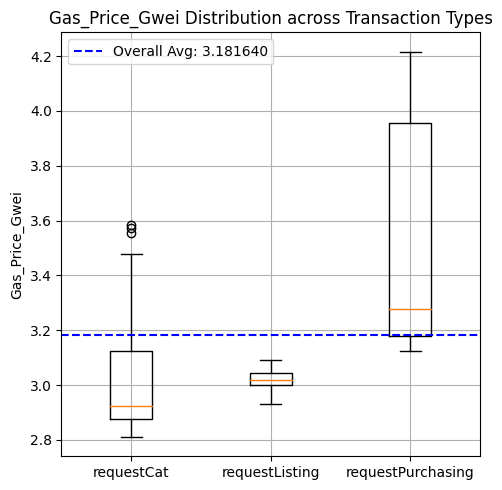

In [60]:
data_box_plot('Gas_Price_Gwei')

Summary Statistics for Transaction Type: requestCat
count    39.000000
mean      0.000562
std       0.000045
min       0.000520
25%       0.000533
50%       0.000542
75%       0.000571
max       0.000664
Name: Tx_Fee_ETH, dtype: float64
----------------------------------------
Summary Statistics for Transaction Type: requestListing
count    39.000000
mean      0.000589
std       0.000021
min       0.000569
25%       0.000582
50%       0.000586
75%       0.000590
max       0.000712
Name: Tx_Fee_ETH, dtype: float64
----------------------------------------
Summary Statistics for Transaction Type: requestPurchasing
count    39.000000
mean      0.000677
std       0.000077
min       0.000606
25%       0.000616
50%       0.000636
75%       0.000769
max       0.000823
Name: Tx_Fee_ETH, dtype: float64
----------------------------------------


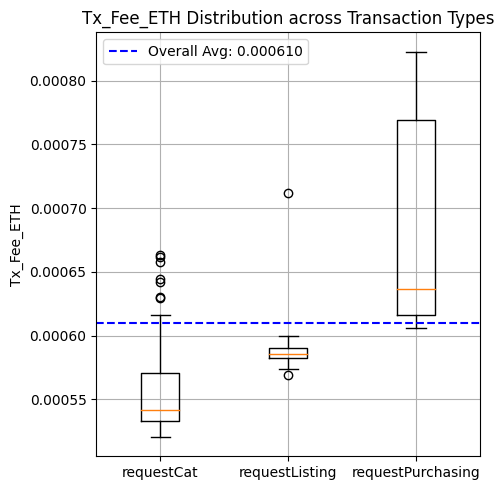

In [61]:
data_box_plot('Tx_Fee_ETH')